## EXERCISE 1
The function $f(x)=\frac{x}{2}-\sin (x)+\frac{\pi}{6}-\frac{\sqrt{3}}{2}$, has two zeros in the interval $[-\pi / 2, \pi]$.Let's began plotting it


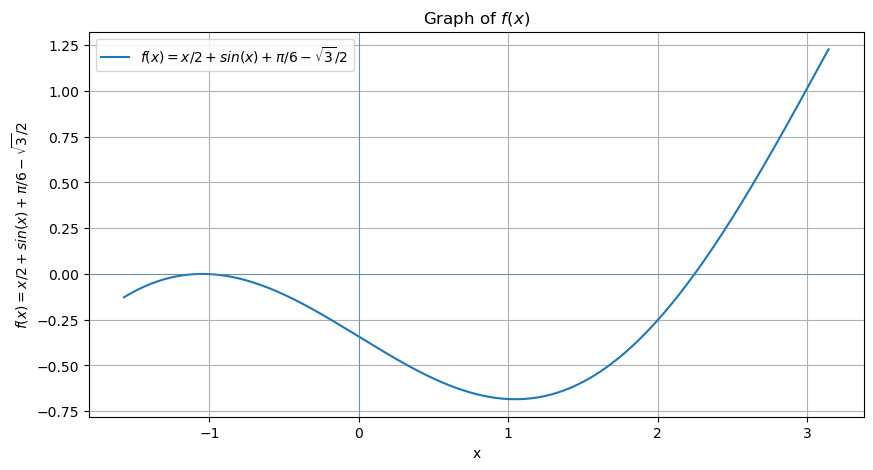

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return (x / 2) - np.sin(x) + np.pi / 6 - np.sqrt(3) / 2

# Generate x values from -pi/2 to pi
x_values = np.linspace(-np.pi / 2, np.pi, 400)
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='$f(x)=x/2+sin(x)+\pi/6-\sqrt{3}/2$')
plt.axhline(0, color='steelblue', linewidth=0.5)
plt.axvline(0, color='steelblue', linewidth=0.5)
plt.title('Graph of $f(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)=x/2+sin(x)+\pi/6-\sqrt{3}/2$')
plt.legend()
plt.grid(True)
plt.show()


a) The bisection method can be used only to approximate one of the two zeros. Apply the bisection method to compute an approximation of this root with a tolerance $t o l=10^{-10}$ on the error, that is, $\left|\alpha-x^k\right| \leq 10^{-10}$. Choose a suitable interval for the intial data by inspecting the graph of the function $f$.

In [2]:
# Define the bisection method
def bisection_method(f, a, b, tol=1e-10, max_iter=1000):
    iterations = 0
    while (b - a) / 2.0 > tol:
        iterations += 1
        midpoint = (a + b) / 2.0

        if f(midpoint) == 0:
            return (midpoint, iterations)
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

        if iterations >= max_iter:
            return (midpoint, iterations)
    
    return (midpoint, iterations)

# Initial interval [a, b]
a = 0
b = np.pi

# Apply the bisection method
root_bisection, iterations_bisection = bisection_method(f, a, b)


print(f'root alpha is :{root_bisection}, iteration times:{iterations_bisection}')



root alpha is :2.2460055893423374, iteration times:34


we show the iteration to find the root

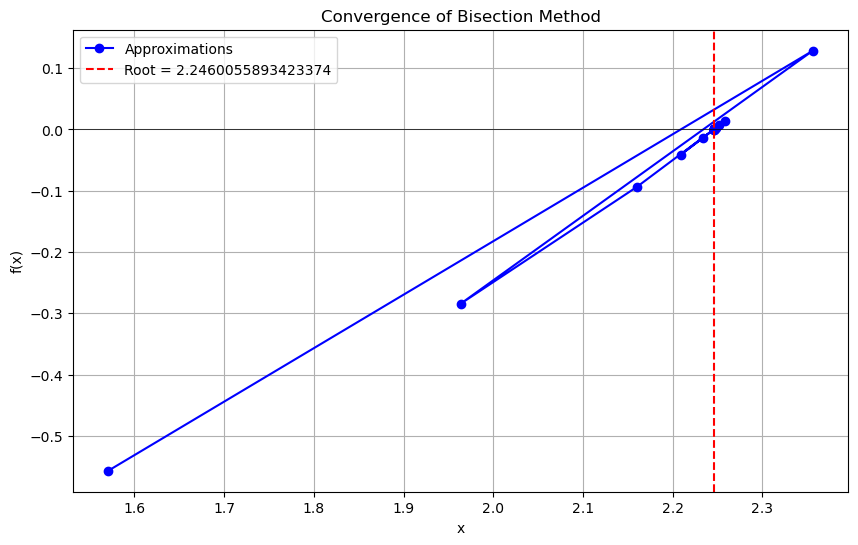

In [3]:
# Bisection method with plotting
# Function to plot the convergence of a root-finding method

def plot_convergence(f, x_values, root, title):
    y_values = f(np.array(x_values))
    root_y = f(root)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, 'bo-', label='Approximations')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(root, color='r', linestyle='--', label=f'Root = {root}')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


def bisection_method_with_plot(f, a, b, tol=1e-10, max_iter=1000):
    iterations = 0
    x_values = []
    while (b - a) / 2.0 > tol:
        iterations += 1
        midpoint = (a + b) / 2.0
        x_values.append(midpoint)

        if f(midpoint) == 0:
            plot_convergence(f, x_values, midpoint, 'Convergence of Bisection Method')
            return (midpoint, iterations)
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

        if iterations >= max_iter:
            plot_convergence(f, x_values, midpoint, 'Convergence of Bisection Method')
            return (midpoint, iterations)
    
    plot_convergence(f, x_values, midpoint, 'Convergence of Bisection Method')
    return (midpoint, iterations)

# Re-run Bisection method with plotting
_, _ = bisection_method_with_plot(f, a, b)


b) Compute both roots $\alpha$ and $\beta$ of the function $f$ using Newton's method. Use the tolerance tol $=10^{-10}$ on the increment between successive iterates $\left(x^{k+1}-x^k\right)$ as stopping criterion, and choose $x_\alpha=\pi, x_\beta=-\pi / 2$ as initial data for the method.
Compare the number of iterations used for each of $\alpha$ and $\beta$, and explain the difference in the number of iterations (if there is one).

In [4]:
# Define the derivative of f(x), f'(x)
def df(x):
    return 1/2 - np.cos(x)

# Define the Newton's method
def newton_method(f, df, x0, tol=1e-10, max_iter=1000):
    iterations = 0
    x = x0
    while True:
        iterations += 1
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return (x_new, iterations)
        x = x_new
        if iterations >= max_iter:
            return (x_new, iterations)

# Initial guesses
x_alpha_initial = np.pi
x_beta_initial = -np.pi / 2

# Apply Newton's method for both roots
root_alpha, iterations_alpha = newton_method(f, df, x_alpha_initial)
root_beta, iterations_beta = newton_method(f, df, x_beta_initial)
print(f'root alpha:{root_alpha},root beta:{root_beta},iteration alpha times:{iterations_alpha},iteration beta times:{iterations_beta}')



root alpha:2.2460055892979742,root beta:-1.0471975514276985,iteration alpha times:5,iteration beta times:28


we show root alpha and beta iteration

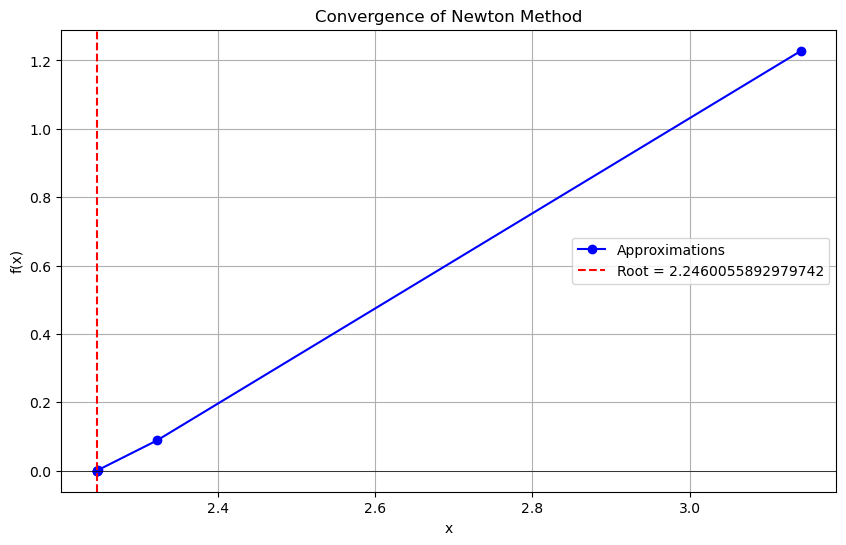

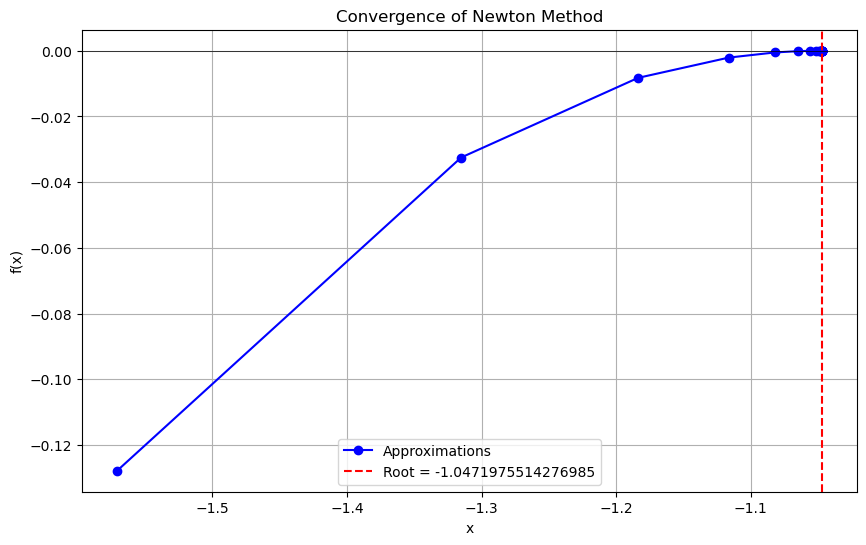

In [5]:
# Newton's method with plotting
def newton_method_with_plot(f, df, x0, tol=1e-10, max_iter=1000):
    iterations = 0
    x = x0
    x_values = [x]
    while True:
        iterations += 1
        x_new = x - f(x) / df(x)
        x_values.append(x_new)
        if abs(x_new - x) < tol:
            plot_convergence(f, x_values, x_new, 'Convergence of Newton Method')
            return (x_new, iterations)
        x = x_new
        if iterations >= max_iter:
            plot_convergence(f, x_values, x_new, 'Convergence of Newton Method')
            return (x_new, iterations)
        
_, _ = newton_method_with_plot(f, df, x_alpha_initial)
_, _ = newton_method_with_plot(f, df, x_beta_initial)

c) For the negative root $\beta$ we can reduce the number of iterations required by applying the modified Newton method
$$
x^{k+1}=x^k-2 \frac{f\left(x^k\right)}{f^{\prime}\left(x^k\right)}
$$
which is second order if $f^{\prime}(\beta)=0$. Implement this method. Report the number of iterations needed to find $\beta$ using this method, with the same initial guess and increment tolerance as in part (b).

In [6]:
# Define the Modified Newton's method
def modified_newton_method(f, df, x0, tol=1e-10, max_iter=1000):
    iterations = 0
    x = x0
    while True:
        iterations += 1
        x_new = x - 2 * f(x) / df(x)
        if abs(x_new - x) < tol:
            return (x_new, iterations)
        x = x_new
        if iterations >= max_iter:
            return (x_new, iterations)

# Apply Modified Newton's method for root beta
root_beta_modified, iterations_beta_modified = modified_newton_method(f, df, x_beta_initial)

print(f'root beta modified:{root_beta_modified},iteration times:{iterations_beta_modified}')



root beta modified:-1.0471975512130902,iteration times:4


We show new modified Newton method iteration

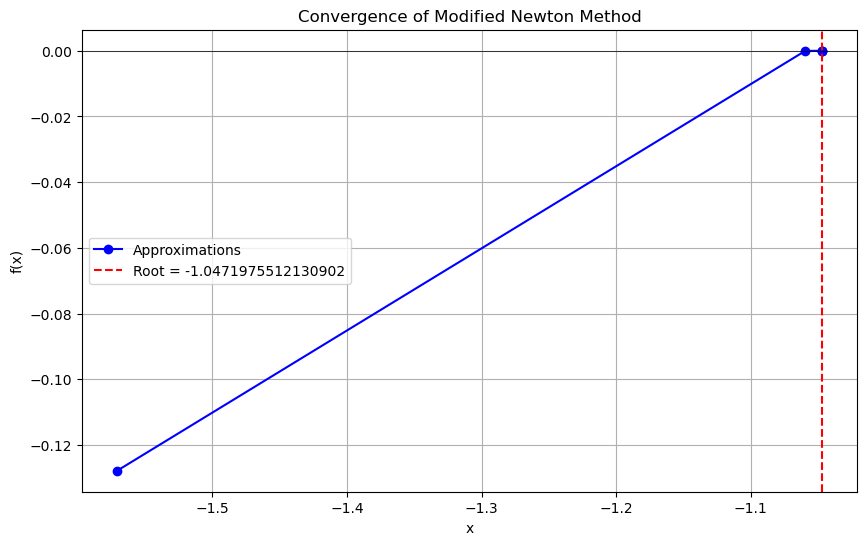

In [7]:
# Modified Newton's method with plotting
def modified_newton_method_with_plot(f, df, x0, tol=1e-10, max_iter=1000):
    iterations = 0
    x = x0
    x_values = [x]
    while True:
        iterations += 1
        x_new = x - 2 * f(x) / df(x)
        x_values.append(x_new)
        if abs(x_new - x) < tol:
            plot_convergence(f, x_values, x_new, 'Convergence of Modified Newton Method')
            return (x_new, iterations)
        x = x_new
        if iterations >= max_iter:
            plot_convergence(f, x_values, x_new, 'Convergence of Modified Newton Method')
            return (x_new, iterations)
_, _ = modified_newton_method_with_plot(f, df, x_beta_initial)